In [1]:
# System variables
import os 
from glob import glob

# Data processing libraries
import numpy as np
import pandas as pd

# Dataset connection
import opendatasets as od

# Graphic tools 
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Download dataset
od.download("https://www.kaggle.com/datasets/yasirabdaali/artificial-intelligence-journals-ranking-20002021")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juancr15
Your Kaggle Key: ········


100%|████████████████████████████████████████| 799k/799k [00:01<00:00, 450kB/s]

In [22]:
def path_csvFiles (PATH = os.getcwd(),EXT = "*.csv"):  
    """
    Retrieve all files with a given extension (EXT = *.csv by default) from current
    working directory where the process is being implemented, using os.getcwd () 
    and the glob module, which finds all path names that resemble a specified pattern 
    according to the rules that are followed in a Unix terminal.
    
    Returns:
        Returns a list with all the files path of the given extension 
    """
    list_paths = []
    for path, subdir, files in os.walk(PATH):
        for file in glob(os.path.join(path, EXT)):
            if file.find("scimagojr") != -1:
                list_paths.append(file)
    return list_paths


def concat_paths(all_paths):
    """receives a list of file directories with a CSV extension 
    and creates a dataset by concatenating each file
    and assigning each file a year label that is stored in the "Year" column,
    returning a dataframe

    Returns: 
        Returns a dataframe
    """

    all_df = []
    for path in all_paths:
        df = pd.read_csv(path, sep = ';')
        df['Year'] = int(path.split()[1])
        all_df.append(df)
    
    df = pd.concat(all_df, ignore_index=True)
    return df 

In [23]:
df = concat_paths(path_csvFiles())
df.head(5)

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Quartile,H index,Total Docs. (2000),Total Docs. (3years),...,Total Docs. (2012),Total Docs. (2013),Total Docs. (2014),Total Docs. (2015),Total Docs. (2016),Total Docs. (2017),Total Docs. (2018),Total Docs. (2019),Total Docs. (2020),Total Docs. (2021)
0,1,12872,Cognitive Psychology,journal,"10955623, 00100285","3,109",Q1,123,17.0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,22478,Journal of Memory and Language,journal,"10960821, 0749596X","2,933",Q1,156,60.0,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,24254,IEEE Transactions on Pattern Analysis and Mach...,journal,01628828,"1,698",Q1,377,128.0,427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,24157,Autonomous Agents and Multi-Agent Systems,journal,"15737454, 13872532","1,679",Q1,72,14.0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24242,IEEE Transactions on Fuzzy Systems,journal,10636706,"1,582",Q1,202,72.0,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

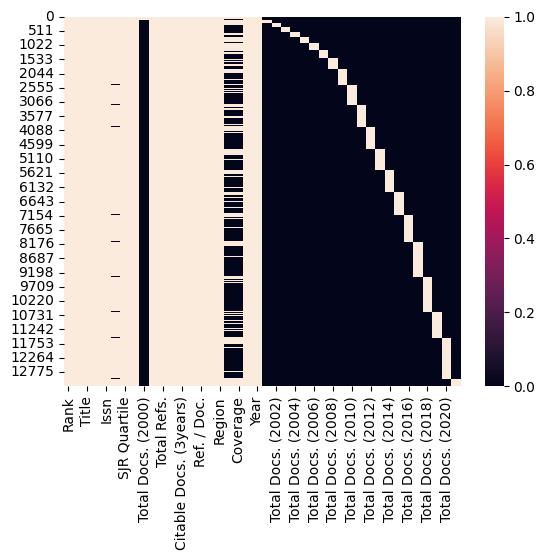

In [24]:
#Visualización de las columnas que representan vacios para eliminarlas
sns.heatmap(df.notnull())

<AxesSubplot: >

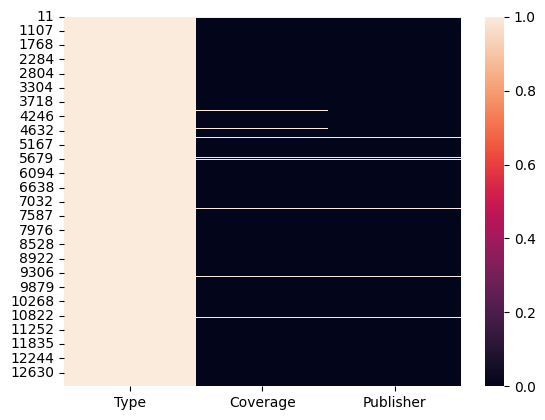

In [26]:
# =============================================================================
# Plot rectangular df as a color-encoded matrix. 
# =============================================================================
sns.heatmap(df[(df['Type'] == "conference and proceedings")][["Type","Coverage","Publisher"]].notnull())

In [27]:
#Preprocessing data

#eliminar registros conference
df = df.loc[(df['Type'] == 'journal') | (df['Type'] == 'book series')]

In [28]:
#eliminar columnas
df.drop(list(df.filter(regex  = '20')), inplace = True, axis=1)


In [29]:
# =============================================================================
# Types columns
# =============================================================================
df.dtypes

Rank                       int64
Sourceid                   int64
Title                     object
Type                      object
Issn                      object
SJR                       object
SJR Quartile              object
H index                    int64
Total Docs. (3years)       int64
Total Refs.                int64
Total Cites (3years)       int64
Citable Docs. (3years)     int64
Cites / Doc. (2years)     object
Ref. / Doc.               object
Country                   object
Region                    object
Publisher                 object
Coverage                  object
Categories                object
Year                       int64
dtype: object

In [30]:
for i in (5, 12, 13):
    print(f"\033[1m {df.columns[i]}:\n\033[0m {list((df[df.columns[i]]))[:30]}\n")

 SJR:
 ['3,109', '2,933', '1,698', '1,679', '1,582', '1,287', '1,192', '1,090', '1,050', '1,018', '0,996', '0,889', '0,844', '0,809', '0,787', '0,722', '0,706', '0,696', '0,680', '0,675', '0,658', '0,632', '0,619', '0,612', '0,586', '0,584', '0,534', '0,532', '0,531', '0,525']

 Cites / Doc. (2years):
 ['3,61', '2,72', '3,36', '3,76', '1,96', '2,56', '1,27', '1,69', '2,72', '1,94', '2,68', '1,19', '1,23', '1,80', '2,23', '0,58', '0,77', '0,48', '1,91', '0,91', '1,65', '1,54', '1,37', '0,65', '1,31', '1,22', '0,89', '1,82', '0,70', '0,60']

 Ref. / Doc.:
 ['76,12', '47,17', '32,63', '42,93', '24,28', '34,91', '28,63', '72,90', '36,03', '45,82', '40,75', '35,85', '25,63', '31,15', '39,20', '23,63', '28,85', '21,88', '38,47', '37,19', '22,64', '15,68', '26,57', '31,09', '25,00', '8,99', '21,08', '42,43', '42,27', '22,95']



In [31]:
df['SJR'] = (df['SJR'].replace(',','.', regex=True).astype(float)).fillna(0)

In [32]:
df['Cites / Doc. (2years)'] = (df['Cites / Doc. (2years)'].replace(',','.', regex=True).astype(float))


In [33]:
df['Ref. / Doc.'] = (df['Ref. / Doc.'].replace(',','.', regex=True).astype(float))

<AxesSubplot: >

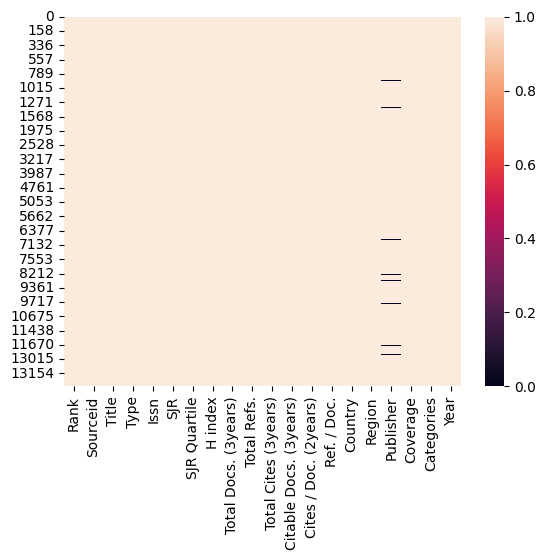

In [34]:
sns.heatmap(df.notnull())

In [35]:
# =============================================================================
# Numeric columns
# =============================================================================
int_df = df.select_dtypes(include=['int64']).copy()
print(f"[{len(int_df)} rows x {len(int_df.columns)} columns]")

[3575 rows x 8 columns]


In [36]:
# =============================================================================
# summarize the central tendency, dispersion and shape of a dataset’s distribution.
# =============================================================================
int_df.describe()

,Rank,Sourceid,H index,Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Year
count,3575.000000,3.575000e+03,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000
mean,219.501818,7.036154e+09,61.194406,219.860979,2950.876084,626.726713,207.285035,2012.398322
std,305.099413,9.545632e+09,56.917252,379.044330,5835.449234,1828.225794,361.225398,6.163479
min,1.000000,1.223700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,47.000000,2.414100e+04,21.000000,62.000000,731.000000,51.000000,56.000000,2008.000000
50%,101.000000,2.548200e+04,45.000000,112.000000,1321.000000,152.000000,102.000000,2013.000000
75%,219.000000,1.990019e+10,79.000000,216.000000,2857.000000,428.000000,201.000000,2018.000000
max,1491.000000,2.110106e+10,377.000000,4239.000000,86050.000000,26359.000000,4154.000000,2021.000000


In [37]:
# =============================================================================
# Categorical columns
# =============================================================================
obj_df = df.select_dtypes(include=['object']).copy()
print(f"[{len(obj_df)} rows x {len(obj_df.columns)} columns]")


[3575 rows x 9 columns]


In [38]:
obj_df.describe()

,Title,Type,Issn,SJR Quartile,Country,Region,Publisher,Coverage,Categories
count,3575,3575,3575,3575,3575,3575,3528,3575,3575
unique,273,2,273,5,34,8,134,104,1033
top,Cognitive Psychology,journal,"10955623, 00100285",Q1,United States,Western Europe,Springer Netherlands,1995-2021,Artificial Intelligence (Q4); Software (Q4)
freq,22,3418,22,796,876,1986,396,132,88


In [ ]:
# =============================================================================
# Categorical columns sets
# =============================================================================
i=0
while i<len(obj_df.columns):    
    print(("\033[1m {}: \n \033[0m {}\n").format(obj_df.columns[i],list(set(obj_df[obj_df.columns[i]]))[:30]))
    i+=1

In [ ]:
text = df['Title'].values 

print(len(set(text)))
wordcloud = WordCloud(width = 2000, height = 2000, 
            background_color = 'white', 
            stopwords = STOPWORDS, 
            min_font_size = 2,
            max_font_size = 100).generate(str(text)) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

print(STOPWORDS)

In [42]:
df.to_csv('journalAI.csv', index=False)